### BIODIVERSITY IN NATIONAL PARKS
# a codecademy data science career path project
### Overview
For this project, you will interpret data from the National Parks Service about endangered species in different parks.

You will perform some data analysis on the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered. During this project, you will analyze, clean up, and plot data as well as pose questions and seek to answer them in a meaningful way.

After you perform your analysis, you will share your findings about the National Park Service.

### Project Objectives:
- Complete a project to add to your portfolio
- Use Jupyter Notebook to communicate findings
- Run an analysis on a set of data
- Become familiar with data analysis workflow

### Prerequisites:
- Data Visualization
- Communicating Data Science Findings

## Load & Inspect Datasets

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load & inspect datasets (1 of 2)
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [3]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [4]:
# Load & inspect datasets (2 of 2)
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [5]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


## Observations dataset
This data set contains 23,296 rows of observations in national parks. It has the following 3 columns:
- `scientific_name` The name of the observed species
- `park_name` The name of the national park where the species was observed
- `observations` The count of the individual species observed

To futher examine the data, I'll determine the following:

- Which (how many) national parks contained the observations?
- How many unique species were observed?
- Which park had the most total observations?

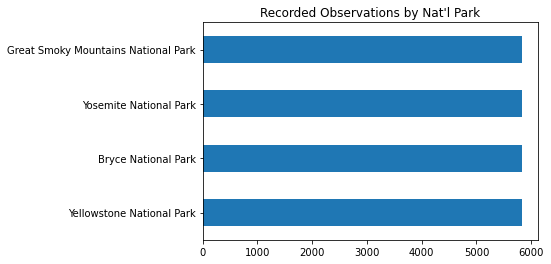

In [6]:
# How many national parks? <-- Four with equal number of recorded observations (5,824).
observations.park_name.value_counts().plot(kind= 'barh')
plt.title('Recorded Observations by Nat\'l Park')
plt.show()

In [7]:
# How many individual species were observedin all of the parks? <-- 5,541
observations.scientific_name.nunique()

5541

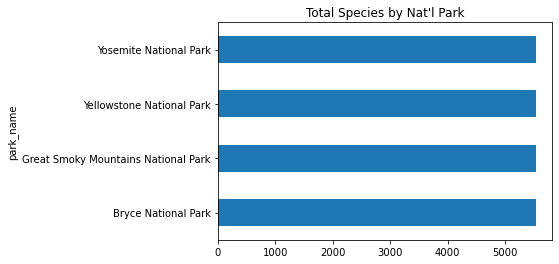

In [8]:
# Total species by Nat'l Park (All species were observed in each of the Nat'l Parks)
observations.groupby('park_name').scientific_name.nunique().plot(kind= 'barh')
plt.title('Total Species by Nat\'l Park')
plt.show()

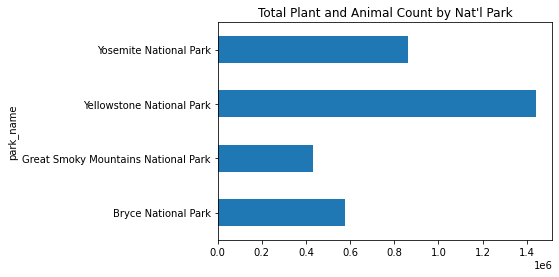

In [9]:
# Total observations by Natl Park (Yellowstone had the highest 'head' count)
observations.groupby('park_name').observations.sum().plot(kind='barh')
plt.title('Total Plant and Animal Count by Nat\'l Park')
plt.show()

## Species dataset
This data set contains the conservation status for all of the observed species. It has 4 columns:
- `category` The species category, ie. 'Mammal', 'Fish', etc.
- `scientific_name` The scientific name of the observed species
- `common_names` The common name(s) of the observed species
- `conservation_status` The conservation, or protected, status for each of the observed species 

I'll explore the following:
- How many categories are represented?
- What are the various conservation status and how many species are in each?
- Which category has the most species with a conservation status?
- Which category has the highest percentage of species with protected status?

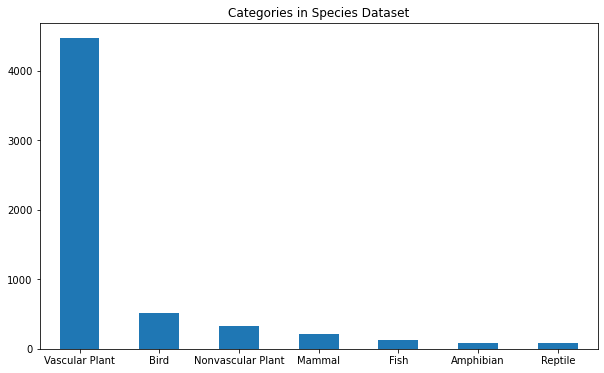

In [10]:
# How many categories? <-- 7
# Most of the observed species fall into the Vascular Plant Category
plt.figure(figsize= (10, 6))
species.category.value_counts().plot(kind= 'bar')
plt.title('Categories in Species Dataset')
plt.xticks(rotation= 0)
plt.show()

In [11]:
# Examine 'conservation_status' Note high numer of NaN values
species.conservation_status.value_counts(dropna= False)

NaN                   5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64

In [12]:
# NaN values must indicate species with no conservation status
# Change NaN to "No Status"
species.conservation_status.fillna(value= 'No Status', inplace= True)
species.conservation_status.value_counts()

No Status             5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64

In [13]:
# Separate out species with conservation status to new dataframe
species_with_status = species[species.conservation_status != 'No Status']

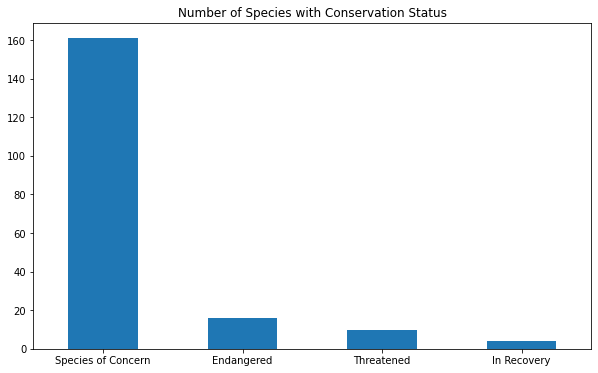

In [14]:
# Species with conservation_status
plt.figure(figsize= (10, 6))
species_with_status.conservation_status.value_counts().plot(kind='bar')
plt.title('Number of Species with Conservation Status')
plt.xticks(rotation= 0)
plt.show()

In [15]:
species_with_status.head()

,category,scientific_name,common_names,conservation_status
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern


In [16]:
# Which species have "Endangered Status"
species_with_status.common_names[species_with_status.conservation_status == 'Endangered']

8                                               Gray Wolf
9                                                Red Wolf
34                                            Gray Myotis
39                  Indiana Bat, Indiana Or Social Myotis
72      Carolina Northern Flying Squirrel, Northern Fl...
173                                        Whooping Crane
276             Bachman's Warbler, Bachman's Wood Warbler
343                               Red-Cockaded Woodpecker
540                                      Duskytail Darter
570                                          Smoky Madtom
2497                      Mountain Avens, Spreading Avens
3275                                          June Sucker
4446                          Sierra Nevada Bighorn Sheep
4448                                      Gray Wolf, Wolf
4505                                    California Condor
4601                     Sierra Nevada Yellow-Legged Frog
Name: common_names, dtype: object

In [17]:
# Which categories have species with special status? <-- All 7 of them
species_with_status.category.value_counts()

Bird                 79
Vascular Plant       46
Mammal               38
Fish                 11
Amphibian             7
Reptile               5
Nonvascular Plant     5
Name: category, dtype: int64

In [18]:
# Categories with each special status
conservation_category = species_with_status.groupby(['conservation_status', 'category'])\
                        .scientific_name.nunique().unstack()
conservation_category

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,6.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,68.0,4.0,22.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


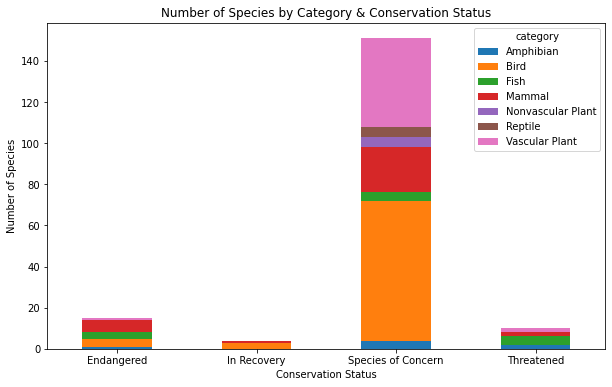

In [19]:
# Graphical representation of categories with each special status
conservation_category.plot(kind= 'bar', figsize= (10, 6), stacked= True)
plt.title('Number of Species by Category & Conservation Status')
plt.xlabel("Conservation Status")
plt.ylabel("Number of Species")
plt.xticks(rotation= 0)
plt.show()

In [20]:
# Which category has the highest percentage of species with protected status?
# Add column to `species` to indicate conservation status (True or False)
species['is_protected'] = species.conservation_status != 'No Status'

In [21]:
# Make a new dataframe to track numbers of protected species
category_counts = species.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index()\
                  .pivot(columns= 'is_protected', index= 'category', values= 'scientific_name')\
                  .reset_index()

category_counts.columns = (['category', 'not_protected', 'protected'])


category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [22]:
# Add columnto see percentage of species with protecetd status
category_counts['percent_protected'] = category_counts.protected / (category_counts.not_protected\
                                                                    + category_counts.protected) * 100

category_counts.sort_values('percent_protected', ascending= False)

,category,not_protected,protected,percent_protected
3,Mammal,146,30,17.045455
1,Bird,413,75,15.368852
0,Amphibian,72,7,8.860759
2,Fish,115,11,8.730159
5,Reptile,73,5,6.410256
4,Nonvascular Plant,328,5,1.501502
6,Vascular Plant,4216,46,1.079305


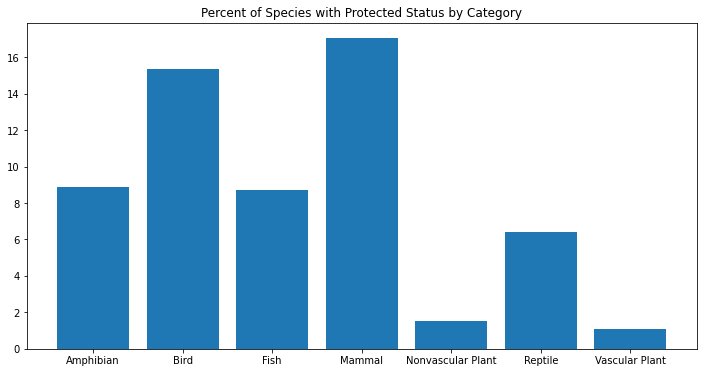

In [23]:
# Plot % of species with protected status by category
plt.figure(figsize= (12, 6))
plt.bar(category_counts.category, category_counts.percent_protected)
plt.title('Percent of Species with Protected Status by Category')
plt.show()

## Conclusion
As is the norm, codecademy has provided datasets with limitations. It would have been nice to know over what time period the data was collected so differences over time could have been analyzed.
Given what was available in the data, I was able to summarize the following:
- The number of Nat'l Parks
- The number of observations within each park
- The number of unique species observed
- Which species have protected status
- Which categories contain species with protected status
- The percent of species with protected status in each category

The project objectives (while not that substantial) were met.